## 读取图片的输入（灰度图，数组文件）

In [1]:
import numpy as np
X = np.loadtxt('test_image.csv',delimiter=',')
y = np.loadtxt('test_label.csv',delimiter=',').astype(int)
y

array([7, 2, 1, ..., 4, 5, 6])

In [2]:
Y = np.eye(10)[y]
Y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

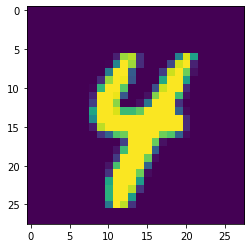

In [3]:
## 数据可视化
import matplotlib.pyplot as plt
plt.imshow(X[-3].reshape(28,28))

## 自己如何去做数据？

1. 手写数字
2. 拍照
3. opencv把图像缩放到28x28
4. opencv把图像转换成灰度图，0~255数值，存储起来
5. 打标签
6. 重复1万次

## 准备交给tensorflow框架训练

In [4]:
## 导包
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import numpy as np

In [5]:
## 创建模型，指定输入和输出，指定激活函数
model = Sequential()
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
## 编译模型，指定模型的训练参数
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [7]:
## 训练模型
model.fit(X,Y,epochs=15,batch_size=128)

Epoch 1/15
79/79 [==============================] - 0s 1ms/step - loss: 41.5580 - accuracy: 0.5799
Epoch 2/15
79/79 [==============================] - 0s 1ms/step - loss: 8.9088 - accuracy: 0.8321
Epoch 3/15
79/79 [==============================] - 0s 1ms/step - loss: 6.4719 - accuracy: 0.8653
Epoch 4/15
79/79 [==============================] - 0s 1ms/step - loss: 5.2866 - accuracy: 0.8814
Epoch 5/15
79/79 [==============================] - 0s 1ms/step - loss: 4.5237 - accuracy: 0.8902
Epoch 6/15
79/79 [==============================] - 0s 1ms/step - loss: 3.9447 - accuracy: 0.8960
Epoch 7/15
79/79 [==============================] - 0s 2ms/step - loss: 3.5487 - accuracy: 0.8984
Epoch 8/15
79/79 [==============================] - 0s 1ms/step - loss: 3.1715 - accuracy: 0.9064
Epoch 9/15
79/79 [==============================] - 0s 1ms/step - loss: 2.7846 - accuracy: 0.9123
Epoch 10/15
79/79 [==============================] - 0s 1ms/step - loss: 2.6120 - accuracy: 0.9107
Epoch 11/15
79/79 

In [8]:
model.predict(X[0].reshape(1,784))

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

3

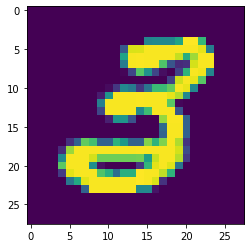

In [15]:
index = np.random.randint(10000)
plt.imshow(X[index].reshape(28,28))
np.argmax(model.predict(X[index].reshape(1,784)))

## 创建一个新的网络模型（更复杂）

In [16]:
## 创建模型，指定输入和输出，指定激活函数
model = Sequential()
model.add(Dense(30,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [17]:
## 编译模型，指定模型的训练参数
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [19]:
## 训练模型
model.fit(X,Y,epochs=100,batch_size=128)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.8416
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.8471
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8554
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8649
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8639
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8763
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8738
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8855
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8864
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8906
Epoch 11/

79/79 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9653
Epoch 83/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9678
Epoch 84/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9700
Epoch 85/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9707
Epoch 86/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1099 - accuracy: 0.9678
Epoch 87/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1142 - accuracy: 0.9655
Epoch 88/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9623
Epoch 89/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9711
Epoch 90/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9738
Epoch 91/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9718
Epoch 92/100


6

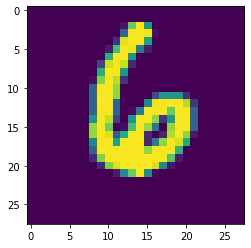

In [25]:
index = np.random.randint(10000)
plt.imshow(X[index].reshape(28,28))
np.argmax(model.predict(X[index].reshape(1,784)))

In [26]:
## 超级复杂的神经网络
## 784-2500-2000-1500-1000-500-10
model = Sequential()
model.add(Dense(2500,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(2000))
model.add(Activation('relu'))
model.add(Dense(1500))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2500)              1962500   
_________________________________________________________________
activation_3 (Activation)    (None, 2500)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              5002000   
_________________________________________________________________
activation_4 (Activation)    (None, 2000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1500)              3001500   
_________________________________________________________________
activation_5 (Activation)    (None, 1500)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)             

In [27]:
## 编译模型，指定模型的训练参数
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [29]:
## 训练模型
model.fit(X,Y,epochs=10,batch_size=128)

Epoch 1/10
79/79 [==============================] - 9s 110ms/step - loss: 0.1791 - accuracy: 0.9437
Epoch 2/10
79/79 [==============================] - 9s 111ms/step - loss: 0.1087 - accuracy: 0.9655
Epoch 3/10
79/79 [==============================] - 9s 109ms/step - loss: 0.0939 - accuracy: 0.9698
Epoch 4/10
79/79 [==============================] - 9s 110ms/step - loss: 0.0598 - accuracy: 0.9791
Epoch 5/10
79/79 [==============================] - 9s 113ms/step - loss: 0.0673 - accuracy: 0.9814
Epoch 6/10
79/79 [==============================] - 9s 116ms/step - loss: 0.0571 - accuracy: 0.9816
Epoch 7/10
79/79 [==============================] - 9s 115ms/step - loss: 0.0545 - accuracy: 0.9815
Epoch 8/10
79/79 [==============================] - 9s 114ms/step - loss: 0.0463 - accuracy: 0.9845
Epoch 9/10
79/79 [==============================] - 9s 114ms/step - loss: 0.0746 - accuracy: 0.9785
Epoch 10/10
79/79 [==============================] - 9s 111ms/step - loss: 0.0415 - accuracy: 0.9876

## 概念总结

多个感知机组合生成神经网络，
ANN (神经网络)
DNN (深度神经网络)
CNN (卷积神经网络)